In [ ]:
#@Author: Zhuowen Li
#@LastEdit: 2021/10/12 下午3:17:20
#@Version: V1
#@Description: #calculate the enrichment of high-order interactions, based on the method described by SPRITE(Sofia A. Quinodoz, Noah Ollikainen, 2018)

In [1]:
import pandas as pd

In [ ]:
#define the rule for shuflling across the genome
#set a region within the same arm for each kee, if kee in peri, locate its region in peri
#for kees in the same arm, keep a solid distance to shuffle.But the kee in the same arm side on chr with another kee should consider the distance first(join k_mer together)
#further aims: normalized by order counts?

# KEE

In [9]:
telomere_and_peri_region = pd.read_table('/public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/porecplot_v3/porec_pre_v2.9/telo/arm.bed',names=['chrom','start','end','name'],header=None)

In [10]:
#there are also two KEE located within the peri region
peri_bed = pd.read_table('~/task/pore_c/porec_1000_filter_mainchr_result/porecplot_v3/porec_pre_v2.9/peri/peri.anchor.bed',names=['chrom','start','end','name'],header=None)

In [11]:
all_divi_bed = pd.concat([telomere_and_peri_region,peri_bed])

In [12]:
kee_bed = pd.read_table('~/task/pore_c/porec_1000_filter_mainchr_result/porecplot_v3/porec_pre_v2.9/kee/kee.bed',names=['chrom','start','end','name'],header=None)

In [13]:
#find the region KEE located in
kee_region_start_dict = {}
for i in kee_bed.itertuples(index=False):
    chrom,start,end,name = i
    select_region = all_divi_bed.query('(chrom == @chrom) & (start <= @start) & (end >= @end)')
    #length are all 300kb, so we can cutoff the end 300kb region, and only shuffle the begion region.
    select_region_cut_end = select_region.eval('end = end - 300000')
    kee_region_start_dict[name] = select_region_cut_end.to_dict(orient='records')[0]

In [14]:
import numpy as np

In [15]:
kee_control_dict = dict()
for kee in ['KEE1','KEE2','KEE3','KEE5','KEE7','KEE9']:
    random_range = np.arange(kee_region_start_dict[kee]['start'],kee_region_start_dict[kee]['end'],1)
    kee_control_dict[kee] = np.random.choice(random_range,replace=False,size=100)

In [16]:
kee3_kee4_dis = int(kee_bed.query('name == "KEE4"').loc[:,'start']) - int(kee_bed.query('name == "KEE3"').loc[:,'start'])
kee_control_dict['KEE4'] = kee_control_dict['KEE3'] + kee3_kee4_dis

In [17]:
kee5_kee6_dis = int(kee_bed.query('name == "KEE6"').loc[:,'start']) - int(kee_bed.query('name == "KEE5"').loc[:,'start'])
kee_control_dict['KEE6'] = kee_control_dict['KEE5'] + kee3_kee4_dis

In [18]:
kee7_kee8_dis = int(kee_bed.query('name == "KEE8"').loc[:,'start']) - int(kee_bed.query('name == "KEE7"').loc[:,'start'])
kee_control_dict['KEE8'] = kee_control_dict['KEE7'] + kee3_kee4_dis

In [19]:
kee9_kee10_dis = int(kee_bed.query('name == "KEE10"').loc[:,'start']) - int(kee_bed.query('name == "KEE9"').loc[:,'start'])
kee_control_dict['KEE10'] = kee_control_dict['KEE9'] + kee3_kee4_dis

In [20]:
start_df = pd.DataFrame(kee_control_dict).T

In [21]:
for i in start_df.columns:
    sub_start = start_df.iloc[:,i]
    sub_start.name = 'c_start'
    kee_sub_merge = pd.merge(kee_bed,sub_start,left_on='name',right_index=True)
    kee_sub_merge['c_end'] = kee_sub_merge['c_start'] + 300000
    kee_sub_merge_reindex = kee_sub_merge.reindex(['chrom','c_start','c_end','name'],axis=1)
    kee_sub_merge_reindex.to_csv(f'/public/home/lizw/task/pore_c/controls/kee/{i}.control.bed',sep="\t",header=None,index=None)

FileNotFoundError: [Errno 2] No such file or directory: '/public/home/lizw/task/pore_c/controls/kee/0.control.bed'

# Telo

In [49]:
telo_bed = pd.read_table('~/task/pore_c/porec_1000_filter_mainchr_result/porecplot_v3/porec_pre_v2.9/telo/telo_300k_no_NOR.bed',names=['chrom','start','end','name'],header=None)

In [50]:
#find the region KEE located in
telo_region_start_dict = {}
for i in telo_bed.itertuples(index=False):
    chrom,start,end,name = i
    select_region = all_divi_bed.query('(chrom == @chrom) & (start <= @start) & (end >= @end)')
    #length are all 300kb, so we can cutoff the end 300kb region, and only shuffle the begion region.
    select_region_cut_end = select_region.eval('end = end - 300000')
    telo_region_start_dict[name] = select_region_cut_end.to_dict(orient='records')[0]

In [51]:
telo_control_dict = dict()
for telo in telo_region_start_dict.keys():
    random_range = np.arange(telo_region_start_dict[telo]['start'],telo_region_start_dict[telo]['end'],1)
    telo_control_dict[telo] = np.random.choice(random_range,replace=False,size=100)

In [52]:
telo_start_df = pd.DataFrame(telo_control_dict).T

In [53]:
for i in telo_start_df.columns:
    sub_start = telo_start_df.iloc[:,i]
    sub_start.name = 'c_start'
    telo_sub_merge = pd.merge(telo_bed,sub_start,left_on='name',right_index=True)
    telo_sub_merge['c_end'] = telo_sub_merge['c_start'] + 300000
    telo_sub_merge_reindex = telo_sub_merge.reindex(['chrom','c_start','c_end','name'],axis=1)
    telo_sub_merge_reindex.to_csv(f'/public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/porecplot_v3/porec_pre_v2.9/controls/telo/{i}.control.bed',sep="\t",header=None,index=None)

In [54]:
telo_sub_merge

,chrom,start,end,name,c_start,c_end
0,1,0,300000,telo_1p,85259,385259
1,1,30127671,30427671,telo_1q,25788219,26088219
2,2,19398289,19698289,telo_2q,11729900,12029900
3,3,0,300000,telo_3p,6677001,6977001
4,3,23159830,23459830,telo_3q,20767101,21067101
5,4,18285056,18585056,telo_4q,8737280,9037280
6,5,0,300000,telo_5p,1326797,1626797
7,5,26675502,26975502,telo_5q,23738692,24038692


In [55]:
telo_start_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
telo_1p,8273769,2907161,5462126,5372775,8042628,1661071,6176089,2529208,8340266,6612002,...,5276194,7830926,8604882,6961470,569386,7682861,7492751,4858610,317604,85259
telo_1q,18438262,29862734,26748151,21007338,24689828,28927401,29364271,18014441,29443064,24981564,...,18079993,19222317,26890939,24069564,19828808,27867683,24903159,30092203,18551293,25788219
telo_2q,18441361,8572722,18974934,13781838,17618611,10100814,14706890,13273244,11345222,9088361,...,8276878,8698830,14997009,17336103,12919269,15129713,18847256,18146706,8324220,11729900
telo_3p,4998299,5878596,674309,6088974,7951968,7244285,112671,6585979,3502823,7484822,...,8516981,6578854,3871665,3082031,8043151,2348002,4445649,1736824,2408516,6677001
telo_3q,18177094,21343666,21658367,22934638,22378067,20477198,22036809,21082237,18124621,21797607,...,22591459,21849814,20736015,17844004,20130860,21217521,20488886,20129526,18427097,20767101
telo_4q,15092870,9700213,9755067,12099378,10690755,11774452,14994398,13868480,8365724,9838835,...,14503882,6947573,16630218,11788617,7511935,6772718,11176761,10956604,12135405,8737280
telo_5p,2938363,697213,8678423,537065,6503788,3705867,7819611,2281862,4253554,2672265,...,1161046,2459701,285819,7884424,8506723,4873170,852944,4135650,754256,1326797
telo_5q,26064933,24591553,22084628,25568396,25617038,21605024,22723742,26114622,26253976,18248505,...,18966469,22375806,18211474,18727876,21634292,23982614,24453375,19362799,20118044,23738692


In [56]:
telo_bed

,chrom,start,end,name
0,1,0,300000,telo_1p
1,1,30127671,30427671,telo_1q
2,2,19398289,19698289,telo_2q
3,3,0,300000,telo_3p
4,3,23159830,23459830,telo_3q
5,4,18285056,18585056,telo_4q
6,5,0,300000,telo_5p
7,5,26675502,26975502,telo_5q


In [57]:
telo_bed

,chrom,start,end,name
0,1,0,300000,telo_1p
1,1,30127671,30427671,telo_1q
2,2,19398289,19698289,telo_2q
3,3,0,300000,telo_3p
4,3,23159830,23459830,telo_3q
5,4,18285056,18585056,telo_4q
6,5,0,300000,telo_5p
7,5,26675502,26975502,telo_5q


In [58]:
telo_sub_merge

,chrom,start,end,name,c_start,c_end
0,1,0,300000,telo_1p,85259,385259
1,1,30127671,30427671,telo_1q,25788219,26088219
2,2,19398289,19698289,telo_2q,11729900,12029900
3,3,0,300000,telo_3p,6677001,6977001
4,3,23159830,23459830,telo_3q,20767101,21067101
5,4,18285056,18585056,telo_4q,8737280,9037280
6,5,0,300000,telo_5p,1326797,1626797
7,5,26675502,26975502,telo_5q,23738692,24038692


In [59]:
pd.merge(telo_bed,sub_start,left_on='name',right_index=True)

,chrom,start,end,name,c_start
0,1,0,300000,telo_1p,85259
1,1,30127671,30427671,telo_1q,25788219
2,2,19398289,19698289,telo_2q,11729900
3,3,0,300000,telo_3p,6677001
4,3,23159830,23459830,telo_3q,20767101
5,4,18285056,18585056,telo_4q,8737280
6,5,0,300000,telo_5p,1326797
7,5,26675502,26975502,telo_5q,23738692


In [60]:
sub_start

telo_1p       85259
telo_1q    25788219
telo_2q    11729900
telo_3p     6677001
telo_3q    20767101
telo_4q     8737280
telo_5p     1326797
telo_5q    23738692
Name: c_start, dtype: int64

# 显著性分析

In [61]:
#首先，根据样本分布和样本大小选取要用的检验模型
##判断1：是否为正态分布
##判断2：是大样本还是小样本
##确认模型

## 判断是否正态分布
https://blog.csdn.net/laobai1015/article/details/107845838

### 示例

KstestResult(statistic=0.020538056980975522, pvalue=0.7847785159218174)

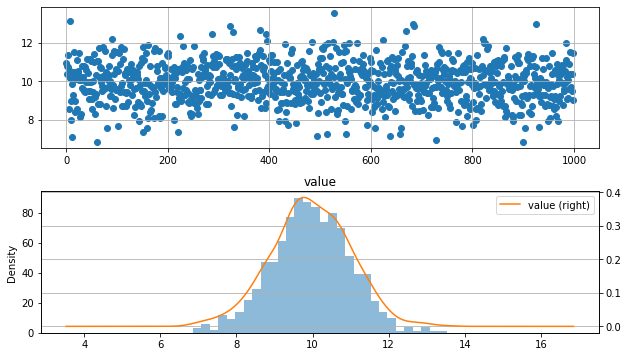

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

s = pd.DataFrame(np.random.randn(1000)+10,columns=['value'])

fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(2,1,1)
ax1.scatter(s.index,s.values)
plt.grid()
ax2 = fig.add_subplot(2,1,2)
s.hist(bins=30,alpha = 0.5,ax=ax2)
s.plot(kind='kde',secondary_y=True,ax=ax2)
plt.grid()

from scipy import stats
u = s['value'].mean()
std = s['value'].std()
stats.kstest(s['value'],'norm',(u,std))

In [63]:
stats.kstest(s['value'],'norm',(u,std))

KstestResult(statistic=0.020538056980975522, pvalue=0.7847785159218174)

In [64]:
def dis_test(s,kind):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize = (10,6))
#     ax1 = fig.add_subplot(2,1,1)
#     ax1.scatter(s)
#     plt.grid()
    ax2 = fig.add_subplot(2,1,2)
    s.hist(bins=30,alpha = 0.5,ax=ax2)
    s.plot(kind='kde',secondary_y=True,ax=ax2)
    plt.grid()

    from scipy import stats
    u = s.mean()
    std = s.std()
    result = stats.kstest(s,kind,(u,std))
    return result

### kee test

In [65]:
import pandas as pd
import numpy as np

In [66]:
kee_suffle_df = pd.read_table('/public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/porecplot_v3/porec_pre_v2.9/controls/kee_out_dir/kee_join_anchor_valuecount.csv')
arr = np.arange(len(kee_suffle_df.columns)) % 2
kee_suffle_df_new = kee_suffle_df.loc[:,arr == 1]
kee_suffle_df_new.index = [1,2,3,4,5]

In [67]:
import pandas as pd

In [68]:
kee_suffle_df = pd.read_table('/public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/porecplot_v3/porec_pre_v2.9/controls/kee_out_dir/kee_join_anchor_valuecount.csv')

In [69]:
kee_suffle_df.iloc[:,[i%2==1 for i in range(len(kee_suffle_df.columns))]].mean(axis=1)

0    432802.160000
1     14710.570000
2       279.290000
3         4.463918
4         3.333333
dtype: float64

In [70]:
kee_suffle_df

,Unnamed: 0,anchor_name,Unnamed: 2,anchor_name.1,Unnamed: 4,anchor_name.2,Unnamed: 6,anchor_name.3,Unnamed: 8,anchor_name.4,...,anchor_name.95,Unnamed: 192,anchor_name.96,Unnamed: 194,anchor_name.97,Unnamed: 196,anchor_name.98,Unnamed: 198,anchor_name.99,Unnamed: 200
0,1.0,577789.0,1.0,401962.0,1.0,308366.0,1.0,580084.0,1.0,312451.0,...,414436.0,1.0,332130.0,1.0,316658.0,1.0,347517.0,1.0,934038.0,NaN
1,2.0,17200.0,2.0,13681.0,2.0,11343.0,2.0,18024.0,2.0,11969.0,...,15611.0,2.0,10865.0,2.0,10836.0,2.0,11011.0,2.0,39268.0,NaN
2,3.0,325.0,3.0,250.0,3.0,268.0,3.0,359.0,3.0,272.0,...,253.0,3.0,184.0,3.0,188.0,3.0,188.0,3.0,613.0,NaN
3,4.0,6.0,4.0,7.0,4.0,4.0,4.0,5.0,4.0,6.0,...,4.0,4.0,4.0,6.0,4.0,7.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


KstestResult(statistic=1.0, pvalue=0.0)

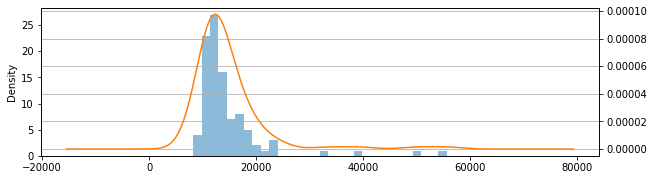

In [71]:
dis_test(kee_suffle_df_new.loc[2,:].dropna(),'powerlaw')

KstestResult(statistic=0.99, pvalue=2.0000000000001775e-200)

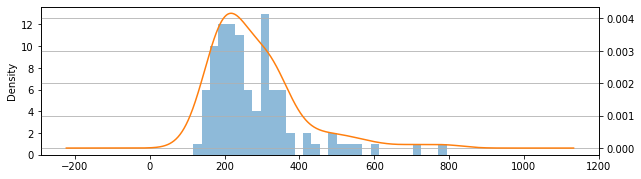

In [72]:
dis_test(kee_suffle_df_new.loc[3,:].dropna(),'powerlaw')

KstestResult(statistic=0.6804123711340206, pvalue=4.606706496534856e-45)

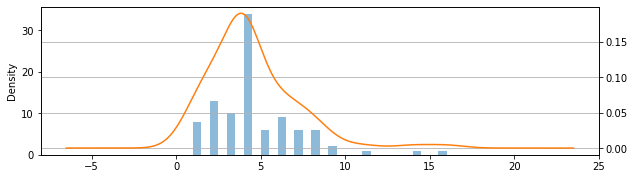

In [73]:
dis_test(kee_suffle_df_new.loc[4,:].dropna(),'powerlaw')

### telo test

In [77]:
telo_suffle_df

,Unnamed: 0,anchor_name,Unnamed: 2,anchor_name.1,Unnamed: 4,anchor_name.2,Unnamed: 6,anchor_name.3,Unnamed: 8,anchor_name.4,...,Unnamed: 190,anchor_name.95,Unnamed: 192,anchor_name.96,Unnamed: 194,anchor_name.97,Unnamed: 196,anchor_name.98,Unnamed: 198,anchor_name.99
0,1,276678,1,286031,1.0,323867.0,1,278920,1,307178,...,1.0,280277.0,1.0,267599.0,1.0,269739.0,1.0,289252.0,1.0,286513.0
1,2,5417,2,4691,2.0,6884.0,2,5013,2,6022,...,2.0,4020.0,2.0,5702.0,2.0,5280.0,2.0,5571.0,2.0,5817.0
2,3,73,3,43,3.0,95.0,3,47,3,82,...,3.0,21.0,3.0,96.0,3.0,61.0,3.0,70.0,3.0,80.0
3,4,1,4,1,NaN,NaN,4,1,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
telo_suffle_df = pd.read_table('/public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/porecplot_v3/porec_pre_v2.9/controls/telo_out_dir/telo_join_anchor_valuecount.csv')
arr = np.arange(len(telo_suffle_df.columns)) % 2
telo_suffle_df_new = telo_suffle_df.loc[:,arr == 1]
telo_suffle_df_new.index = [1,2,3,4]

In [87]:
telo_suffle_df_new

,anchor_name,anchor_name.1,anchor_name.2,anchor_name.3,anchor_name.4,anchor_name.5,anchor_name.6,anchor_name.7,anchor_name.8,anchor_name.9,...,anchor_name.90,anchor_name.91,anchor_name.92,anchor_name.93,anchor_name.94,anchor_name.95,anchor_name.96,anchor_name.97,anchor_name.98,anchor_name.99
1,276678,286031,323867.0,278920,307178,259056.0,295725,270114,264809.0,265503.0,...,277606.0,289660.0,264588.0,270295.0,333826.0,280277.0,267599.0,269739.0,289252.0,286513.0
2,5417,4691,6884.0,5013,6022,3928.0,5652,4444,4044.0,5383.0,...,4060.0,4621.0,3776.0,4599.0,5911.0,4020.0,5702.0,5280.0,5571.0,5817.0
3,73,43,95.0,47,82,29.0,53,46,26.0,58.0,...,29.0,49.0,32.0,48.0,63.0,21.0,96.0,61.0,70.0,80.0
4,1,1,NaN,1,1,NaN,4,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
telo_suffle_df_new.iloc[2,:].mean()

51.57

# u test

## kee

In [17]:
import scipy.stats as stats
# perform two-sided test. You can use 'greater' or 'less' for one-sided test

In [85]:
kee_suffle_df_new.iloc[2,:].mean()

279.29

In [91]:
kee_suffle_df_new

,anchor_name,anchor_name.1,anchor_name.2,anchor_name.3,anchor_name.4,anchor_name.5,anchor_name.6,anchor_name.7,anchor_name.8,anchor_name.9,...,anchor_name.90,anchor_name.91,anchor_name.92,anchor_name.93,anchor_name.94,anchor_name.95,anchor_name.96,anchor_name.97,anchor_name.98,anchor_name.99
1,577789.0,401962.0,308366.0,580084.0,312451.0,441827.0,335516.0,476297.0,429525,521205.0,...,617096.0,831346.0,828411.0,625562.0,319322.0,414436.0,332130.0,316658.0,347517.0,934038.0
2,17200.0,13681.0,11343.0,18024.0,11969.0,13499.0,11163.0,15062.0,12844,12660.0,...,17311.0,17423.0,33428.0,23150.0,12076.0,15611.0,10865.0,10836.0,11011.0,39268.0
3,325.0,250.0,268.0,359.0,272.0,216.0,191.0,340.0,213,227.0,...,306.0,555.0,360.0,540.0,283.0,253.0,184.0,188.0,188.0,613.0
4,6.0,7.0,4.0,5.0,6.0,7.0,3.0,7.0,3,2.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
stats.mannwhitneyu(x=[285069], y=kee_suffle_df_new.loc[1,:].dropna(), alternative = 'greater')

MannwhitneyuResult(statistic=3.0, pvalue=0.9702970297029709)

In [43]:
stats.mannwhitneyu(x=[18312], y=kee_suffle_df_new.loc[2,:].dropna(), alternative = 'greater')

MannwhitneyuResult(statistic=87.0, pvalue=0.10529525952504248)

In [90]:
stats.mannwhitneyu(x=[1145], y=kee_suffle_df_new.loc[3,:].dropna(), alternative = 'greater')

MannwhitneyuResult(statistic=100.0, pvalue=0.044761892917465684)

In [31]:
stats.mannwhitneyu(x=[75], y=kee_suffle_df_new.loc[4,:].dropna(), alternative = 'greater')

MannwhitneyuResult(statistic=97.0, pvalue=0.041087869139155596)

## telo

In [38]:
stats.mannwhitneyu(x=[242077], y=telo_suffle_df_new.loc[1,:].dropna(), alternative = 'greater')

MannwhitneyuResult(statistic=0.0, pvalue=1.0)

In [21]:
stats.mannwhitneyu(x=[22776], y=telo_suffle_df_new.loc[2,:].dropna(), alternative = 'greater')

MannwhitneyuResult(statistic=93.0, pvalue=0.07245580510922818)

In [89]:
stats.mannwhitneyu(x=[2553], y=telo_suffle_df_new.loc[3,:].dropna(), alternative = 'greater')

MannwhitneyuResult(statistic=100.0, pvalue=0.044708686713384724)

In [23]:
stats.mannwhitneyu(x=[342], y=telo_suffle_df_new.loc[4,:].dropna(), alternative = 'greater')

MannwhitneyuResult(statistic=97.0, pvalue=0.041087869139155596)

In [88]:
telo_suffle_df_new

,anchor_name,anchor_name.1,anchor_name.2,anchor_name.3,anchor_name.4,anchor_name.5,anchor_name.6,anchor_name.7,anchor_name.8,anchor_name.9,...,anchor_name.90,anchor_name.91,anchor_name.92,anchor_name.93,anchor_name.94,anchor_name.95,anchor_name.96,anchor_name.97,anchor_name.98,anchor_name.99
1,276678,286031,323867.0,278920,307178,259056.0,295725,270114,264809.0,265503.0,...,277606.0,289660.0,264588.0,270295.0,333826.0,280277.0,267599.0,269739.0,289252.0,286513.0
2,5417,4691,6884.0,5013,6022,3928.0,5652,4444,4044.0,5383.0,...,4060.0,4621.0,3776.0,4599.0,5911.0,4020.0,5702.0,5280.0,5571.0,5817.0
3,73,43,95.0,47,82,29.0,53,46,26.0,58.0,...,29.0,49.0,32.0,48.0,63.0,21.0,96.0,61.0,70.0,80.0
4,1,1,NaN,1,1,NaN,4,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
